In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 15 - Time dependent Hamiltonian 2

In previous tutorials, we covered how to set an initial state to a quantum system and how to describe its Hamiltonian.

Here, we will evolve the quantum system under the unitary dynamics of its Hamiltonian.
First, we create a quantum system and describe its Hamiltonian 

$H=f_{z}J_{z} + f_{d}(t)\sigma_{+} + f_{d}^{*}(t)\sigma_{-}$

and, for the sake of the example, we won't use the special `Qubit` class.

In [2]:
qubFreq = 1

driveFreq = 2
driveAmp = 1
drivePhase = 0
couplingStrength = 1

OmegaR = couplingStrength*driveAmp
detun = qubFreq-driveFreq
Omega = np.sqrt((OmegaR**2) + (detun**2))

In [3]:
qub = qg.QuantumSystem(operator=qg.Jz)
qub.dimension = 2
qub.frequency = qubFreq

# add the drive terms 
secondTerm = qub.createTerm(operator=qg.sigmap)
secondTerm.frequency = driveFreq

thirdTerm = qub.createTerm(operator=qg.sigmam)
thirdTerm.frequency = driveFreq

qub.initialState = 1

qub.simTotalTime = 2*np.pi
qub.simStepSize = 0.01

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .resultsDict
def compute(qsys, state):
    qsys.resultsDict['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

In [4]:
# def secondTermTime(st, ti):
#     return -driveAmp*couplingStrength*np.exp(1j*(2*np.pi*driveFreq*ti + drivePhase))

def secondTermTime(st, ti):
    st.frequency = couplingStrength*driveAmp*np.cos(2*np.pi*driveFreq*ti + drivePhase)

def thirdTermTime(st, ti):
    st.frequency =  -driveAmp*couplingStrength*np.exp(-1j*(2*np.pi*driveFreq*ti + drivePhase))

secondTerm.timeDependency = secondTermTime
thirdTerm.timeDependency = thirdTermTime

In [5]:
states = qub.runSimulation()

In [6]:
qub._freeEvol.numberOfExponentiations, len(qub.simulation.timeList)

(629, 630)

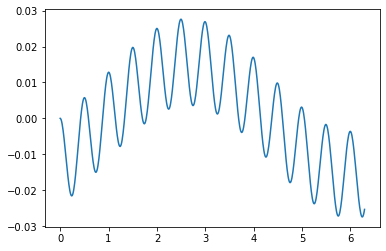

In [7]:
plt.plot(qub.simulation.timeList, qub.resultsDict['sigmax expectation'])